### Hi Professor,
#### This note is a disclaimer that the work here is clearly not the best. Part 3 is unaswered and Parts 1 and 2 are not great either. Honestly, I have no prior experience with machine learning or datasets like this, so I am trying to learn all the prerequisite stuff on the fly. I promise my upcoming assignments will be much more flushed out and clear, as I will be practicing more and more.
#### Thank you for understanding,
#### Patrick Adams

# Part 1:

In [225]:
import pandas as pd
import numpy as np


In [226]:
#Imported modules

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [227]:
#loading dataframe

df = pd.read_csv("diabetes.csv")

In [228]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [229]:
#Scaler function from scratch
scaler = (df - df.mean())/df.std()

In [230]:
scaler.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1.365006
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,-0.731643
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1.365006
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,-0.731643
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1.365006


In [244]:
X = scaler.drop(['Outcome'], axis =1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


In [248]:
#Train Model and Predict
k = 84
clf = KNeighborsClassifier(n_neighbors = k)

clf.fit(X_train,y_train)
Pred_y = clf.predict(X_test)
print("Accuracy of model at K=84 is",metrics.accuracy_score(y_test, Pred_y))

#Warning filter
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

Accuracy of model at K=84 is 0.7662337662337663


Minimum error: 0.22077922077922077 at K = 84


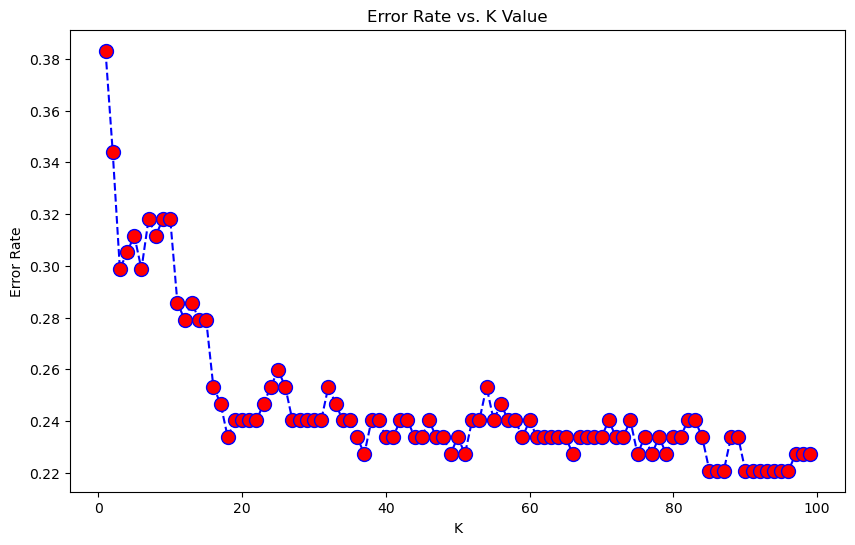

In [249]:
#Plotting some data

error_rate = []
for i in range(1,100):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate)))


In [250]:
#More imports

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt


In [251]:
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=42, shuffle=True)

In [252]:
for i, (train_index, test_index) in enumerate(cv.split(X)):
    print(f"Fold {i}:")    
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[  0   1   3   4   5   6   8   9  11  12  13  14  15  16  17  18  19  20
  21  22  24  25  26  27  28  29  32  34  35  36  37  38  40  41  42  43
  44  45  46  47  48  50  51  52  53  56  57  58  59  60  61  62  64  68
  69  70  71  73  74  75  80  82  83  85  87  88  89  90  91  92  93  94
  95  96  98  99 100 102 103 104 105 106 107 108 110 111 112 113 114 115
 116 117 119 121 122 123 124 125 126 127 128 129 130 131 132 134 135 136
 138 139 140 141 142 143 144 145 146 147 149 150 151 152 153 154 156 157
 158 159 160 161 162 163 164 165 166 167 169 170 171 172 173 175 176 177
 178 179 180 182 183 184 185 186 187 188 189 190 191 194 195 197 198 200
 201 202 203 205 206 207 214 216 217 219 221 222 223 224 225 226 228 229
 230 231 232 233 235 236 237 238 240 241 242 243 245 246 247 248 249 251
 252 253 255 256 257 258 260 261 262 263 264 266 267 268 269 270 271 272
 273 274 276 277 278 279 280 282 283 284 285 286 287 288 289 291 292 293
 294 295 297 298 301 302 303

In [253]:
scores = cross_val_score(clf, X_train, y_train, cv = cv)

# Mean and Std:

In [254]:
scores.mean()


0.7296947887511661

In [255]:
scores.std()

0.04611246824402215

# Confusion Matrix

Normalized confusion matrix
[[0.93939394 0.06060606]
 [0.54545455 0.45454545]]


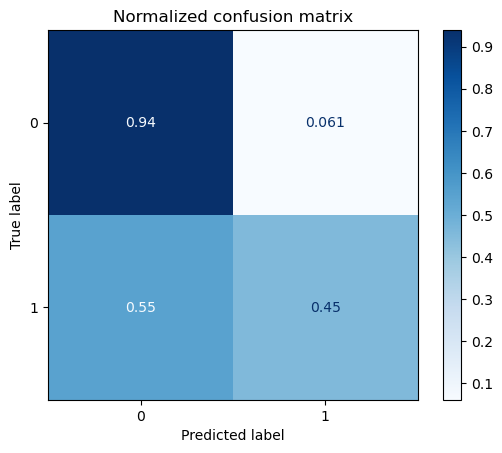

In [256]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


titles_options = [
    ("Normalized confusion matrix", "true")
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        #display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## This model is only accurate when it comes to true negatives, which is not the most ideal. Although 94% for True Negatives is good,the issue lies within the models ability to prediction a true positivie. The model will predict false when the pateint truly has diabtes 55% of the time which is not good. Using KNN, the model is not as accurate as we would like it to be.

# Part 2:

## Gaussian

In [64]:
#imports
from sklearn.naive_bayes import GaussianNB

In [94]:
XGauss_train, XGauss_test, yGauss_train, yGauss_test = train_test_split(X, y, test_size=0.2, random_state=None)

XGauss_train, XGauss_val, yGauss_train, yGauss_val = train_test_split(XGauss_train, yGauss_train, test_size=0.25, random_state=None)

In [95]:
modelGauss = GaussianNB()

In [96]:
modelGauss.fit(XGauss_train, yGauss_train)

GaussianNB()

In [97]:
yGauss_pred = modelGauss.predict(XGauss_test)

In [98]:
print("Accuracy:",metrics.accuracy_score(yGauss_test, yGauss_pred))

Accuracy: 0.7467532467532467


In [100]:
cvGauss = KFold(n_splits=5)

In [101]:
scoresGauss = cross_val_score(modelGauss, XGauss_train, yGauss_train, cv=cvGauss)

### Gauss Training KCV Mean and STD:

In [102]:
scoresGauss.mean()

0.7499999999999999

In [103]:
scoresGauss.std()

0.022800192351525028

### Gauss Validation KCV Mean and STD:

In [104]:
modelGauss.fit(XGauss_val, yGauss_val)

GaussianNB()

In [105]:
yGauss_pred = modelGauss.predict(XGauss_test)

In [117]:
print("Accuracy:",metrics.accuracy_score(yGauss_test, yGauss_pred))

Accuracy: 0.7272727272727273


In [107]:
cvGaussVal = KFold(n_splits=5)

In [111]:
scoresGaussVal = cross_val_score(modelGauss, XGauss_val, yGauss_val, cv=cvGaussVal)

In [112]:
scoresGaussVal.mean()

0.7731182795698925

In [113]:
scoresGaussVal.std()

0.03912560300787151

## The Gaussian model is showing to have an accuracy of about 75% in the training set and 73% in the validation set.

## Multinomial:

In [150]:
#imports
from sklearn.naive_bayes import MultinomialNB

#Cannot use negative numbers, trying to go around this by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

In [151]:
Xminmax = df.drop(['Outcome'], axis =1)
yminmax = df['Outcome']

Xmnb_train, Xmnb_test, ymnb_train, ymnb_test = train_test_split(Xminmax, yminmax, test_size=0.2, random_state=None)

Xmnb_train, Xmnb_val, ymnb_train, ymnb_val = train_test_split(Xmnb_train, ymnb_train, test_size=0.25, random_state=None)

In [261]:
#scaling data

newScale = MinMaxScaler()

Xmnb_train = newScale.fit_transform(Xmnb_train)
Xmnb_test = newScale.transform(Xmnb_test)


In [160]:
clfMNB = MultinomialNB()

In [161]:
clfMNB.fit(Xmnb_train, ymnb_train)

MultinomialNB()

In [165]:
ymnb_pred = clfMNB.predict(Xmnb_test)

In [166]:
print("Accuracy:",metrics.accuracy_score(ymnb_test, ymnb_pred))

Accuracy: 0.4675324675324675


In [186]:
cvMNB= KFold(n_splits=5)

In [187]:
scoresMNB = cross_val_score(clfMNB, Xmnb_train, ymnb_train, cv=cvMNB)

## Multinomial Training KCV Mean and STD:

In [188]:
scoresMNB.mean()

0.6434782608695653

In [189]:
scoresMNB.std()

0.07157425057893185

## Multinomial Validation KCV Mean and STD:

In [259]:
clfMNB.fit(Xmnb_val.values, ymnb_val)

ymnb_pred = clfMNB.predict(Xmnb_test)

print("Accuracy:",metrics.accuracy_score(ymnb_test, ymnb_pred))


Accuracy: 0.5909090909090909


In [218]:
cvMNB_Val = KFold(n_splits=5)

scoresMNB_Val = cross_val_score(clfMNB, Xmnb_train, ymnb_train, cv=cvMNB_Val)


In [219]:
scoresMNB_Val.mean()

0.6434782608695653

In [220]:
scoresMNB_Val.std()

0.07157425057893185

## The Multinomial model showed an even worse accuracy than the Gaussian Model at 59%. This makes sense, however, because a different scale was used due to the fact that the previous scaling had negative number and multinomail does not accept negatives. 

# Bernoulli:

In [200]:
#imports
from sklearn.naive_bayes import BernoulliNB

In [201]:
clfBernoulli = BernoulliNB()

In [203]:
X_bern_train, X_bern_test, y_bern_train, y_bern_test = train_test_split(X, y, test_size=0.2, random_state=None)

X_bern_train, X_bern_val, y_bern_train, y_bern_val = train_test_split(X_bern_train, y_bern_train, test_size=0.25, random_state=None)

In [204]:
clfBernoulli.fit(X_bern_train,y_bern_train)

BernoulliNB()

In [206]:
y_bern_pred = clfBernoulli.predict(X_bern_test)

In [207]:
print("Accuracy:",metrics.accuracy_score(y_bern_test, y_bern_pred))

Accuracy: 0.7597402597402597


In [221]:
cvBern = KFold(n_splits=5)

scoresBern = cross_val_score(clfBernoulli, X_bern_val, y_bern_val, cv=cvBern)

## Bernoulli Training KCV Mean and STD:

In [222]:
scoresBern.mean()

0.5982795698924731

In [223]:
scoresBern.std()

0.12148082347797547

## Bernoulli Validation KCV Mean and STD:

In [211]:
clfBernoulli.fit(X_bern_val,y_bern_val)

BernoulliNB()

In [212]:
y_bern_pred = clfBernoulli.predict(X_bern_test)

In [213]:
print("Accuracy:",metrics.accuracy_score(y_bern_test, y_bern_pred))

Accuracy: 0.7142857142857143


In [216]:
cvBernVal = KFold(n_splits=5)

scoresBernVal = cross_val_score(clfBernoulli, X_bern_val, y_bern_val, cv=cvBernVal)

In [217]:
scoresBernVal.mean()

0.5982795698924731

## The Bernoulli Model ends up having an accuracy of 76% in the training set and 71% in the validation set.

# According to the models that were trained, it seems as if the best Naives Bayes model for this data is the Bernoulli Model. I am not sure what to think of this because on one hand, Bernoulli, in theory, takes only binary numbers. I do not believe I correctly fitted the data to match that criteria, yet I recieved no issues when running the code. On the other hand, the "Outcome" column, which is our column of interest, is in fact a column with binary options with 0 and 1. 


# Part 3:


In [ ]:
#empty

# Part 4:

#### According to the models that were trained and tested, it seems that KNN is the best choice to go with for classifying the data. Although the results aren't spectacular, the accuracy is the highest using KNN.